## **1. Data Preprocessing**


. Import Libraries and Read Data

In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder ,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt


**2. Data Exploration and Initial Observations**

In [71]:
data = pd.read_csv('diabetic_data.csv')



In [72]:
#display the data
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3
admission_source_id,1,7,7,7,7,2,2,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12


In [73]:
data.shape

(101766, 50)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [75]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,NaN,NaN,NaN,165201645.622978,102640295.983458,12522.0,84961194.0,152388987.0,230270887.5,443867222.0
patient_nbr,101766.0,NaN,NaN,NaN,54330400.694947,38696359.346534,135.0,23413221.0,45505143.0,87545949.75,189502619.0
race,101766,6,Caucasian,76099,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,101766,3,Female,54708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,101766,10,[70-80),26068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,101766,10,?,98569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type_id,101766.0,NaN,NaN,NaN,2.024006,1.445403,1.0,1.0,1.0,3.0,8.0
discharge_disposition_id,101766.0,NaN,NaN,NaN,3.715642,5.280166,1.0,1.0,1.0,4.0,28.0
admission_source_id,101766.0,NaN,NaN,NaN,5.754437,4.064081,1.0,1.0,7.0,7.0,25.0
time_in_hospital,101766.0,NaN,NaN,NaN,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0


In [76]:
data['readmitted'].value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

**3. Data Cleaning and Handling Missing Values**

In [77]:
data.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [78]:
#count missing values
for col in data.columns:
    if data[col].dtype == object:
         print(col,data[col][data[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [80]:

print(data['gender'][data['gender'] == 'Unknown/Invalid'].count())

3


In [81]:

data = data.drop(set(data['gender'][data['gender'] == 'Unknown/Invalid'].index))
data = data.drop(set(data["race"][data["race"] == '?'].index))


In [ ]:
data.replace("?", np.nan, inplace=True) 

In [83]:
data.isnull().sum().sort_values(ascending=False)


weight                      96432
medical_specialty           48766
payer_code                  39710
diag_3                       1348
diag_2                        335
diag_1                         18
encounter_id                    0
troglitazone                    0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
miglitol                        0
examide                         0
tolazamide                      0
glimepiride                     0
citoglipton                     0
insulin                         0
glyburide-metformin             0
glipizide-metformin             0
glimepiride-pioglitazone        0
metformin-rosiglitazone         0
metformin-pioglitazone          0
change                          0
diabetesMed                     0
acetohexamide                   0
repaglinide                     0
chlorpropamide

In [86]:
# dropping columns with large number of missing values
data = data.drop(['weight','payer_code','medical_specialty','max_glu_serum',"A1Cresult" ], axis = 1)

# Drop identifier columns
data=data.drop(["encounter_id","patient_nbr"],axis=1)

# Drop two attributes citoglipton and examide that have the all same value

data=data.drop(["citoglipton","examide"],axis = 1)

**decode IDs using mapping file**

In [87]:
print(data[['admission_type_id', 'discharge_disposition_id', 'admission_source_id']].head())


   admission_type_id  discharge_disposition_id  admission_source_id
0                  6                        25                    1
1                  1                         1                    7
2                  1                         1                    7
3                  1                         1                    7
4                  1                         1                    7


In [88]:
df_mapping1=pd.read_csv('admission_type_mapping.csv')
df_mapping2=pd.read_csv('discharge_disposition_mapping.csv')
df_mapping3=pd.read_csv('admission_source_mapping.csv')



admission_type_mapping = dict(zip(df_mapping1['admission_type_id'], df_mapping1['description']))
discharge_disposition_mapping = dict(zip(df_mapping2['discharge_disposition_id'], df_mapping2['description']))
admission_source_mapping = dict(zip(df_mapping3['admission_source_id'], df_mapping3['description']))




In [89]:
data['admission_type_id'] = data['admission_type_id'].map(admission_type_mapping)
data['discharge_disposition_id'] = data['discharge_disposition_id'].map(discharge_disposition_mapping)
data['admission_source_id'] = data['admission_source_id'].map(admission_source_mapping)


In [90]:

print(data[['admission_type_id', 'discharge_disposition_id', 'admission_source_id']].head())


  admission_type_id discharge_disposition_id  admission_source_id
0               NaN               Not Mapped   Physician Referral
1         Emergency       Discharged to home       Emergency Room
2         Emergency       Discharged to home       Emergency Room
3         Emergency       Discharged to home       Emergency Room
4         Emergency       Discharged to home       Emergency Room


In [91]:
data.shape

(99491, 43)

In [92]:
data.isnull().sum()

race                           0
gender                         0
age                            0
admission_type_id           5225
discharge_disposition_id    3673
admission_source_id         6698
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        18
diag_2                       335
diag_3                      1348
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazone                   0
rosiglitazone                  0
acarbose  

In [93]:

data['admission_source_id'] = data['admission_source_id'].replace('Not Mapped',' Unknown/Invalid')
data['admission_source_id'] = data['admission_source_id'].replace('Not Available',' Unknown/Invalid')
data['admission_source_id']=data['admission_source_id'].fillna('Unknown/Invalid')


data['discharge_disposition_id'] = data['discharge_disposition_id'].replace('Not Mapped',' Unknown/Invalid')
data['discharge_disposition_id']=data['discharge_disposition_id'].fillna('Unknown/Invalid')

data['admission_type_id'] = data['admission_type_id'].replace('Not Mapped','Not Available')
data['admission_type_id']=data['admission_type_id'].fillna('Not Available')

In [94]:
data[['diag_1','diag_2','diag_3']].head(25).T   

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,22,23,24,25,26,27
diag_1,250.83,276,648,8,197,414,414,428,398,434,...,999,410,682,402,410,V57,189,786,427,996
diag_2,NaN,250.01,250,250.43,157,411,411,492,427,198,...,507,411,174,425,401,715,496,401,428,585
diag_3,NaN,255,V27,403,250,250,V45,250,38,486,...,996,414,250,416,582,V43,427,250,414,250.01


In [95]:
data['diag_1'].value_counts()

diag_1
428    6739
414    6406
786    3938
410    3518
486    3425
       ... 
216       1
V43       1
838       1
955       1
V51       1
Name: count, Length: 714, dtype: int64

**Feature Transformation for ic9**

In [ ]:
def diag_cluster(col):
    diag_list = []
    for x in col:
        if pd.isna(x): 
            diag_list.append('Unknown')
            continue

        x = str(x)
        if 'V' in x or 'E' in x:
            diag_list.append("External causes")
            continue

        try:
            x_float = float(x)
            if 1 <= x_float <= 139:
                diag_list.append("Infectious and parasitic diseases")
            elif 140 <= x_float <= 239:
                diag_list.append("Neoplasms")
            elif 240 <= x_float <= 279:
                diag_list.append("Endocrine, nutritional, and metabolic diseases")
            elif 280 <= x_float <= 289:
                diag_list.append("Diseases of the blood and blood-forming organs")
            elif 290 <= x_float <= 319:
                diag_list.append("Mental disorders")
            elif 320 <= x_float <= 389:
                diag_list.append("Nervous system diseases")
            elif 390 <= x_float <= 459:
                diag_list.append("Circulatory system diseases")
            elif 460 <= x_float <= 519:
                diag_list.append("Respiratory system diseases")
            elif 520 <= x_float <= 579:
                diag_list.append("Digestive system diseases")
            elif 580 <= x_float <= 629:
                diag_list.append("Genitourinary system diseases")
            elif 630 <= x_float <= 679:
                diag_list.append("Pregnancy, childbirth, and the puerperium")
            elif 680 <= x_float <= 709:
                diag_list.append("Skin and subcutaneous tissue diseases")
            elif 710 <= x_float <= 739:
                diag_list.append("Musculoskeletal system diseases")
            elif 740 <= x_float <= 759:
                diag_list.append("Congenital anomalies")
            elif 760 <= x_float <= 779:
                diag_list.append("Certain conditions originating in the perinatal period")
            elif 780 <= x_float <= 799:
                diag_list.append("Symptoms, signs, and abnormal clinical findings")
            elif 800 <= x_float <= 999:
                diag_list.append("Injury and poisoning")
            else:
                diag_list.append("Unknown")
        except ValueError:
            diag_list.append("Unknown")

    return diag_list


In [97]:

data['diag_1'] = diag_cluster(data['diag_1'])
data['diag_2'] = diag_cluster(data['diag_2'])
data['diag_3'] = diag_cluster(data['diag_3'])


In [98]:

data[['diag_1','diag_2','diag_3']].head(25).T

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,22,23,24,25,26,27
diag_1,"Endocrine, nutritional, and metabolic diseases","Endocrine, nutritional, and metabolic diseases","Pregnancy, childbirth, and the puerperium",Infectious and parasitic diseases,Neoplasms,Circulatory system diseases,Circulatory system diseases,Circulatory system diseases,Circulatory system diseases,Circulatory system diseases,...,Injury and poisoning,Circulatory system diseases,Skin and subcutaneous tissue diseases,Circulatory system diseases,Circulatory system diseases,External causes,Neoplasms,"Symptoms, signs, and abnormal clinical findings",Circulatory system diseases,Injury and poisoning
diag_1,"Endocrine, nutritional, and metabolic diseases","Endocrine, nutritional, and metabolic diseases","Pregnancy, childbirth, and the puerperium",Infectious and parasitic diseases,Neoplasms,Circulatory system diseases,Circulatory system diseases,Circulatory system diseases,Circulatory system diseases,Circulatory system diseases,...,Injury and poisoning,Circulatory system diseases,Skin and subcutaneous tissue diseases,Circulatory system diseases,Circulatory system diseases,External causes,Neoplasms,"Symptoms, signs, and abnormal clinical findings",Circulatory system diseases,Injury and poisoning
diag_1,"Endocrine, nutritional, and metabolic diseases","Endocrine, nutritional, and metabolic diseases","Pregnancy, childbirth, and the puerperium",Infectious and parasitic diseases,Neoplasms,Circulatory system diseases,Circulatory system diseases,Circulatory system diseases,Circulatory system diseases,Circulatory system diseases,...,Injury and poisoning,Circulatory system diseases,Skin and subcutaneous tissue diseases,Circulatory system diseases,Circulatory system diseases,External causes,Neoplasms,"Symptoms, signs, and abnormal clinical findings",Circulatory system diseases,Injury and poisoning


In [99]:
data['diag_1'].value_counts()

diag_1
Circulatory system diseases                        29653
Endocrine, nutritional, and metabolic diseases     11179
Respiratory system diseases                        10171
Digestive system diseases                           9036
Symptoms, signs, and abnormal clinical findings     7495
Injury and poisoning                                6815
Genitourinary system diseases                       4989
Musculoskeletal system diseases                     4826
Neoplasms                                           3353
Infectious and parasitic diseases                   2699
Skin and subcutaneous tissue diseases               2477
Mental disorders                                    2180
External causes                                     1608
Nervous system diseases                             1184
Diseases of the blood and blood-forming organs      1089
Pregnancy, childbirth, and the puerperium            669
Congenital anomalies                                  50
Unknown                 

In [100]:
data.shape

(99491, 43)

**Encode categorical features using label/one-hot encoding**

In [102]:
data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [103]:
categorical_columns = [
    'race', 'gender', 'age',
    'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
    'max_glu_serum', 'A1Cresult', 'change', 'diabetesMed',
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
    'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
    'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
    'metformin-pioglitazone'
]
numerical_columns = [
        'time_in_hospital', 'num_lab_procedures', 'num_procedures',
        'num_medications', 'number_outpatient', 'number_emergency',
        'number_inpatient', 'number_diagnoses'
    ]

In [104]:
data['readmitted'] = data['readmitted'].apply(lambda x: 1 if x == '<30' else 0)
data['readmitted'].value_counts()

## cope for data to visualize
data2=data.copy()


In [105]:

nominal_cols = [ 'race','admission_type_id', 'discharge_disposition_id', 'admission_source_id','diag_1','diag_2','diag_3']
ordinal_cols = ['age', 'max_glu_serum']

age_mapping = {'[0-10)': 0, '[10-20)': 1, '[20-30)': 2, '[30-40)': 3, 
               '[40-50)': 4, '[50-60)': 5, '[60-70)': 6, '[70-80)': 7, 
               '[80-90)': 8, '[90-100)': 9}
data['age'] = data['age'].map(age_mapping)


insulin_mapping = {'No': 0, 'Down': 1, 'Steady': 1, 'Up': 1}

data['change'] = data['change'].replace('Ch', 1)
data['change'] = data['change'].replace('No', 0)
data['gender'] = data['gender'].replace('Male', 1)
data['gender'] = data['gender'].replace('Female', 0)
data['diabetesMed'] = data['diabetesMed'].replace('Yes', 1)
data['diabetesMed'] = data['diabetesMed'].replace('No', 0)




data['insulin'] = data['insulin'].map(insulin_mapping)  


medication_cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 
                   'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
                   'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
                   'miglitol', 'troglitazone', 'tolazamide', 'glyburide-metformin', 'glipizide-metformin', 
                   'glimepiride-pioglitazone', 'metformin-rosiglitazone', 
                   'metformin-pioglitazone']

for col in medication_cols:
    data[col] = data[col].map(insulin_mapping)


data= pd.get_dummies(data, columns=nominal_cols, prefix=nominal_cols, dtype=int)


C:\Temp\ipykernel_15108\1543683017.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['change'] = data['change'].replace('No', 0)
C:\Temp\ipykernel_15108\1543683017.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender'] = data['gender'].replace('Female', 0)
C:\Temp\ipykernel_15108\1543683017.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior

In [106]:
data.columns



Index(['gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       ...
       'diag_3_Injury and poisoning', 'diag_3_Mental disorders',
       'diag_3_Musculoskeletal system diseases', 'diag_3_Neoplasms',
       'diag_3_Nervous system diseases',
       'diag_3_Pregnancy, childbirth, and the puerperium',
       'diag_3_Respiratory system diseases',
       'diag_3_Skin and subcutaneous tissue diseases',
       'diag_3_Symptoms, signs, and abnormal clinical findings',
       'diag_3_Unknown'],
      dtype='object', length=144)

## . Exploratory Data Analysis (EDA)

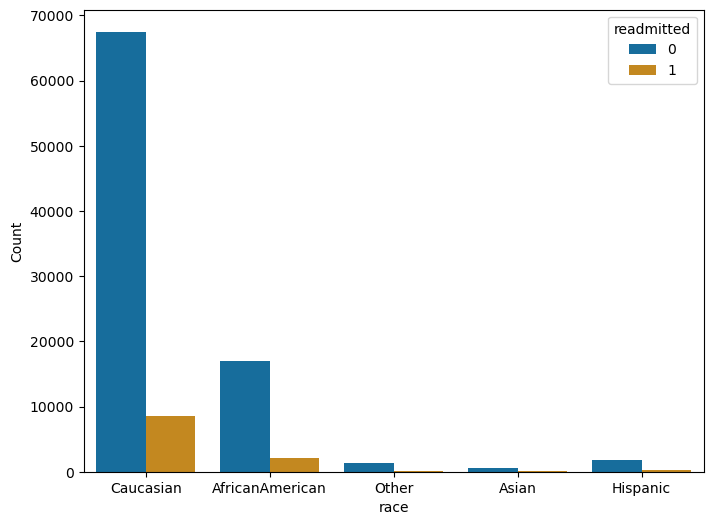

In [107]:
# Count plot using Seaborn for race
plt.figure(figsize=(8, 6))
sns.countplot(x='race', hue='readmitted',data=data2, palette='colorblind')
plt.xlabel('race')
plt.ylabel('Count')

plt.show()

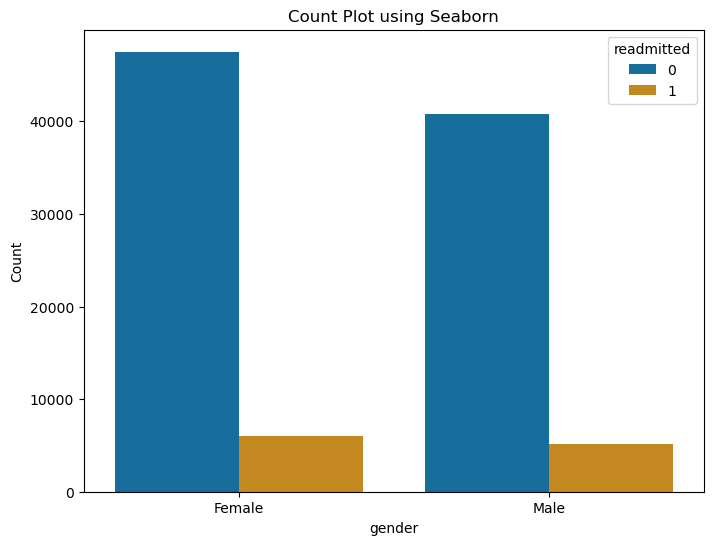

In [108]:
# Count plot using Seaborn for gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='readmitted',data=data2, palette='colorblind')
plt.xlabel('gender')
plt.ylabel('Count')
plt.title('Count Plot using Seaborn')
plt.show()


C:\Temp\ipykernel_15108\1444704002.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Temp\ipykernel_15108\1444704002.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Temp\ipykernel_15108\1444704002.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


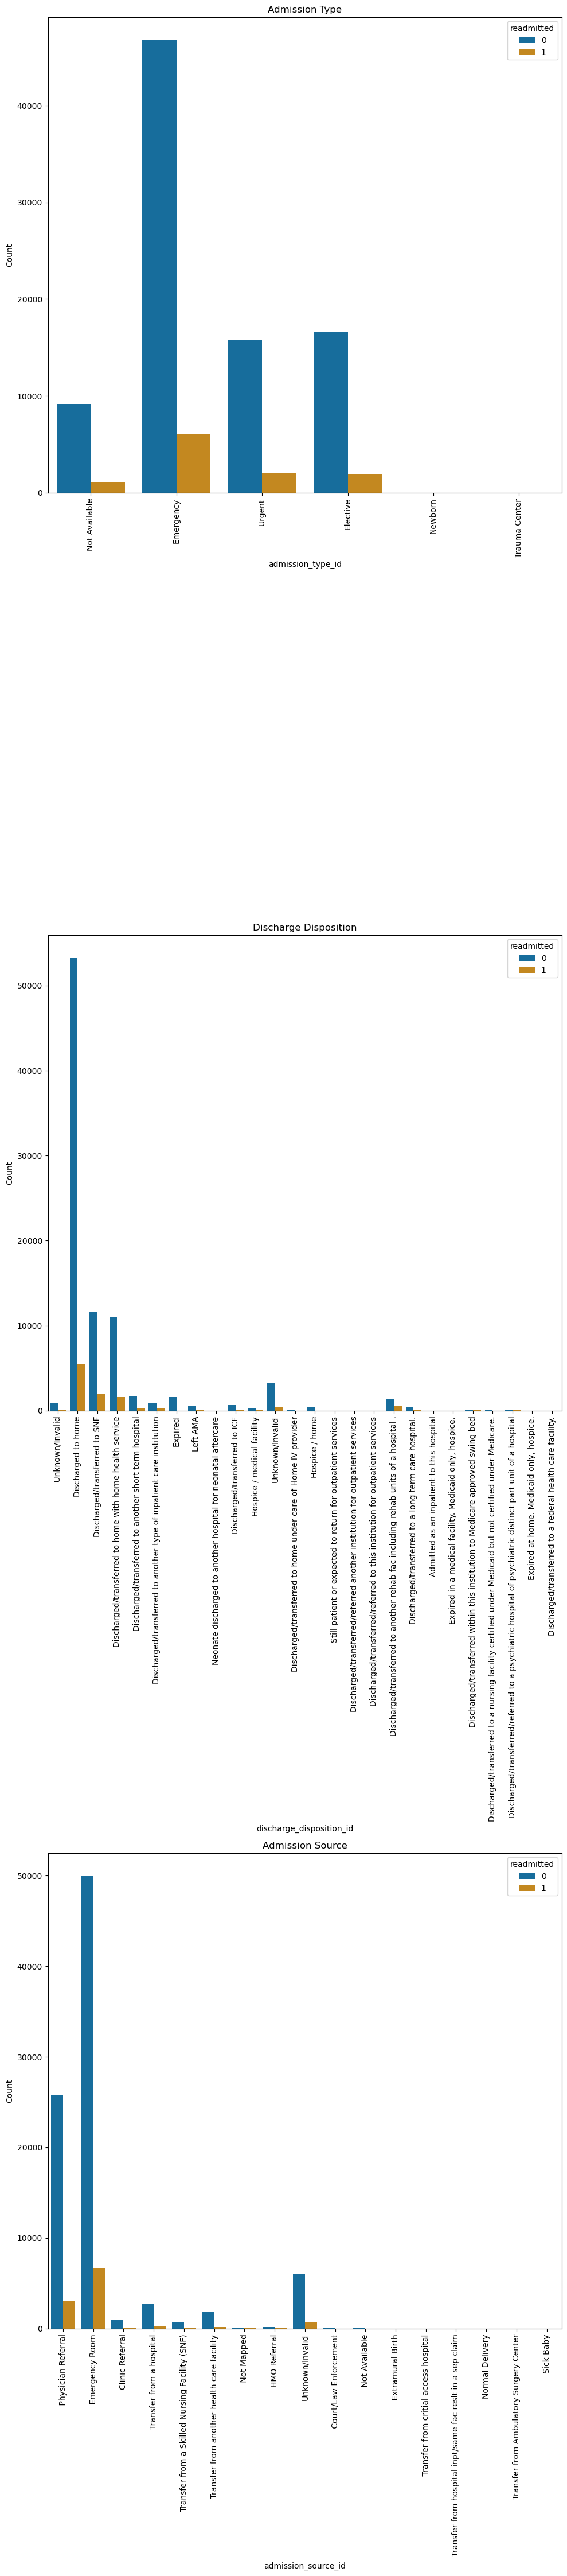

In [109]:
cols = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']
titles = ['Admission Type', 'Discharge Disposition', 'Admission Source']

fig, axes = plt.subplots(3, 1, figsize=(10, 45))  
for i, col in enumerate(cols):
    ax = axes[i]
    plot = sns.countplot(x=col, hue='readmitted', data=data2, palette='colorblind', ax=ax)
    ax.set_title(titles[i])
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

C:\Temp\ipykernel_15108\89137237.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Temp\ipykernel_15108\89137237.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Temp\ipykernel_15108\89137237.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


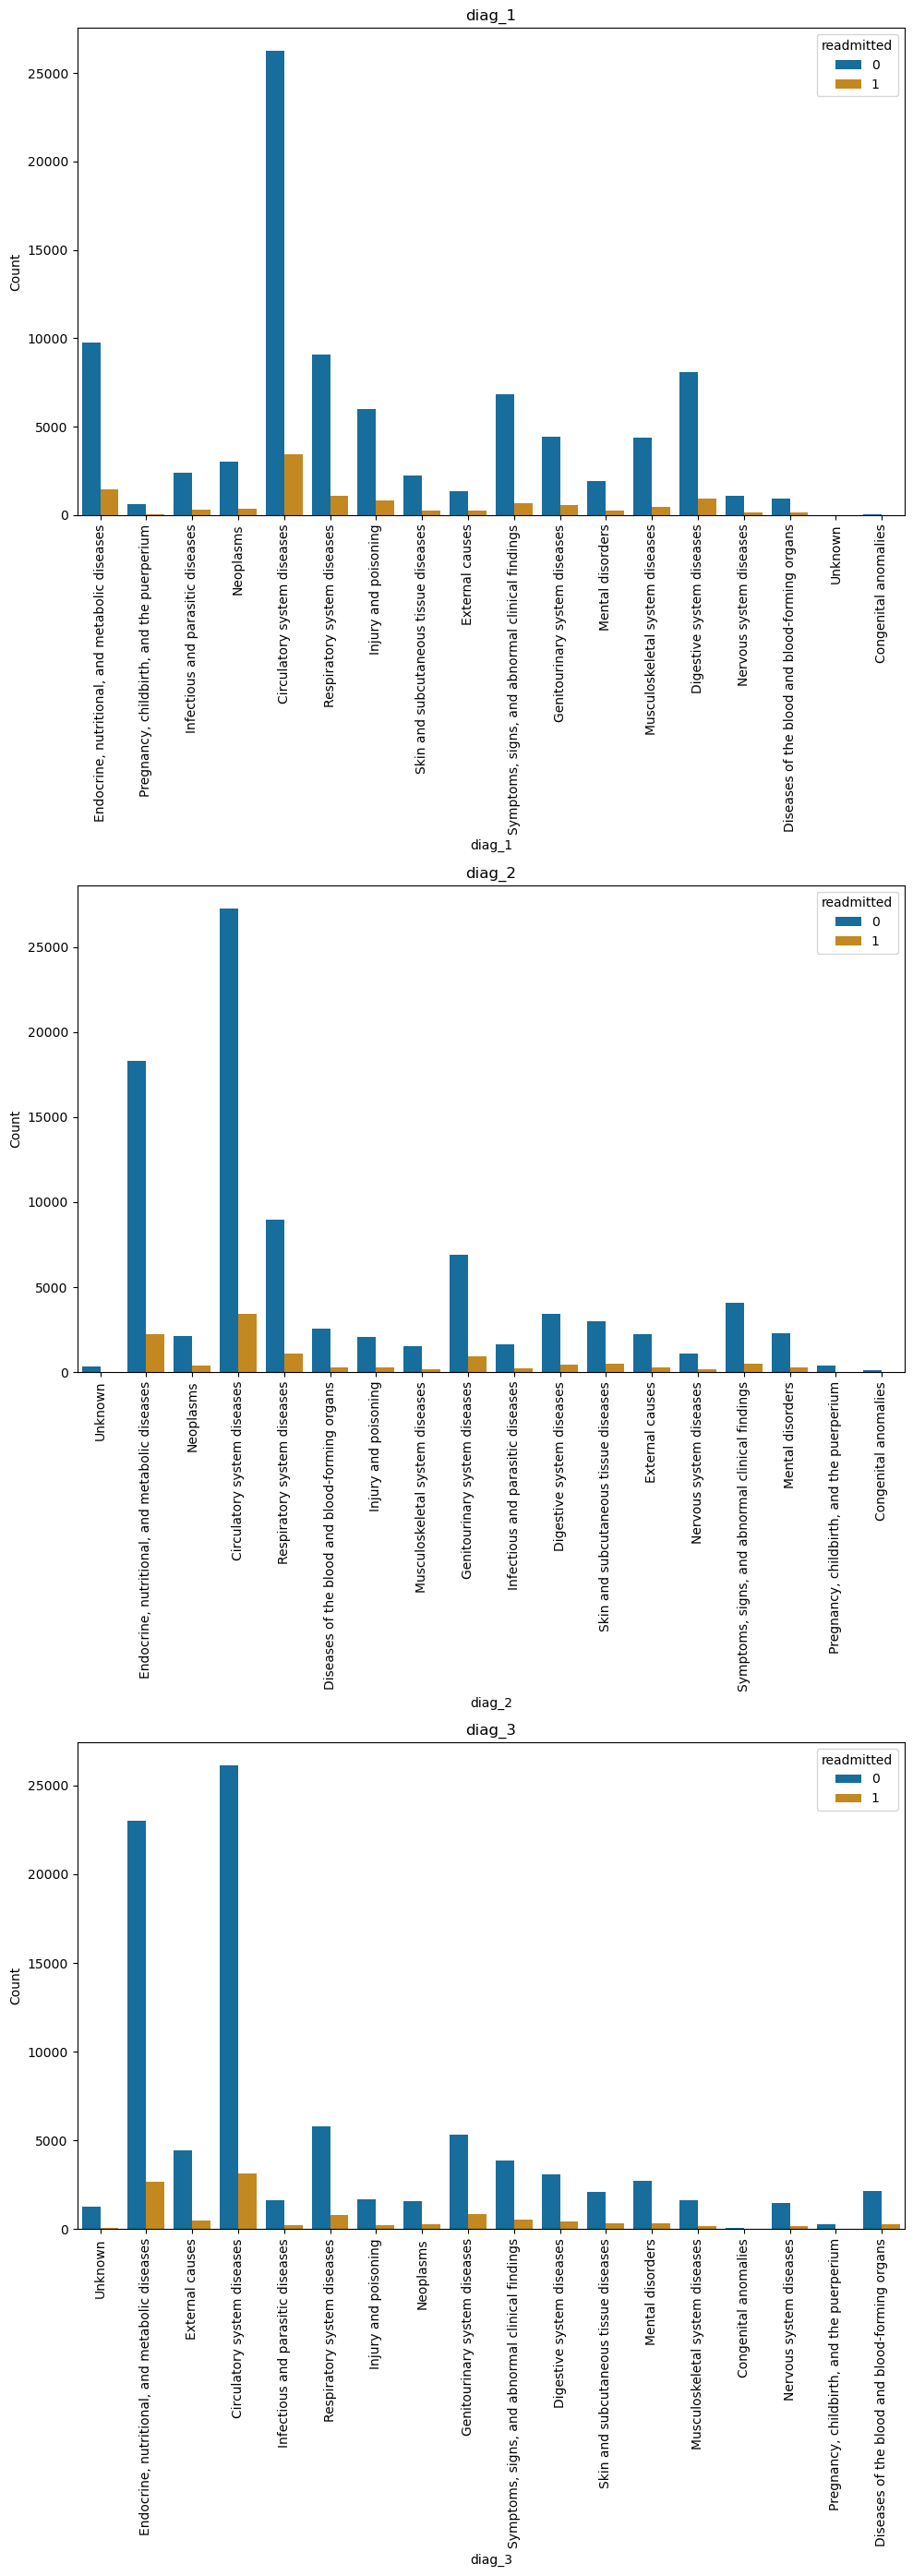

In [110]:
cols = ['diag_1','diag_2','diag_3']
titles = ['diag_1','diag_2','diag_3']

fig, axes = plt.subplots(3, 1, figsize=(10, 28))  # 3 صفوف وعمود واحد

for i, col in enumerate(cols):
    ax = axes[i]
    plot = sns.countplot(x=col, hue='readmitted', data=data2, palette='colorblind', ax=ax)
    ax.set_title(titles[i])
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

In [111]:

# plt.show()

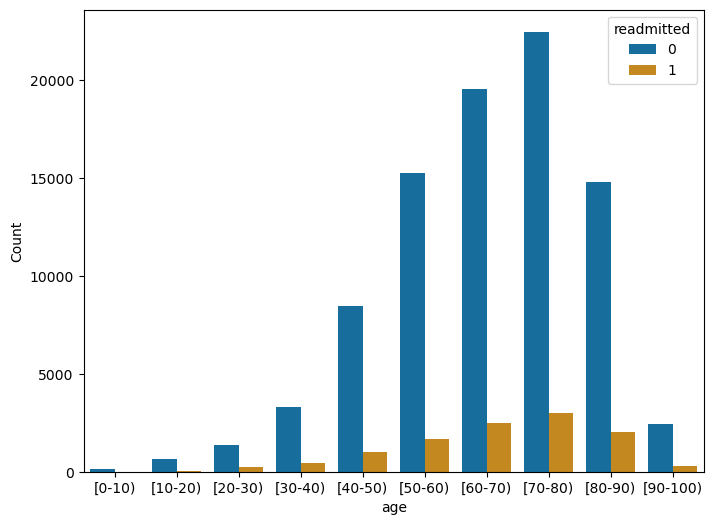

In [112]:

# Count plot using Seaborn for age
plt.figure(figsize=(8, 6))
sns.countplot(x='age', hue='readmitted',data=data2, palette='colorblind')
plt.xlabel('age')
plt.ylabel('Count')
plt.show()

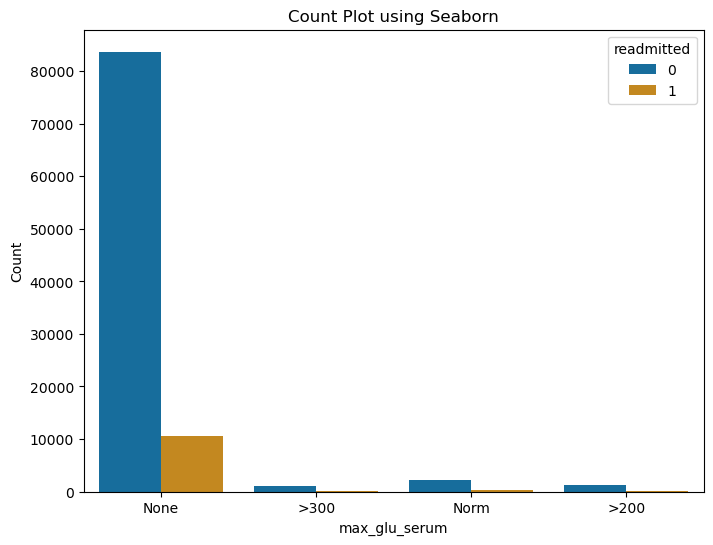

In [113]:
# Count plot using Seaborn for max_glu_serum
plt.figure(figsize=(8, 6))
sns.countplot(x='max_glu_serum', hue='readmitted',data=data2, palette='colorblind')
plt.xlabel('max_glu_serum')
plt.ylabel('Count')
plt.title('Count Plot using Seaborn')
plt.show()

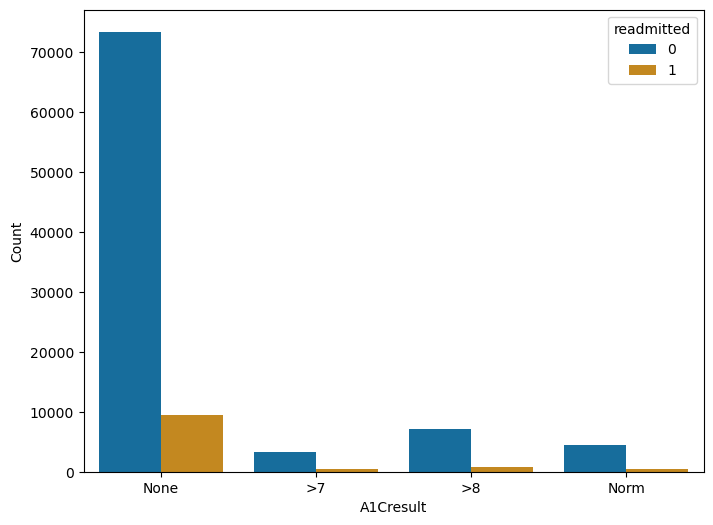

In [114]:
# Count plot using Seaborn for A1Cresult
plt.figure(figsize=(8, 6))
sns.countplot(x='A1Cresult', hue='readmitted',data=data2, palette='colorblind')
plt.xlabel('A1Cresult')
plt.ylabel('Count')
plt.show()


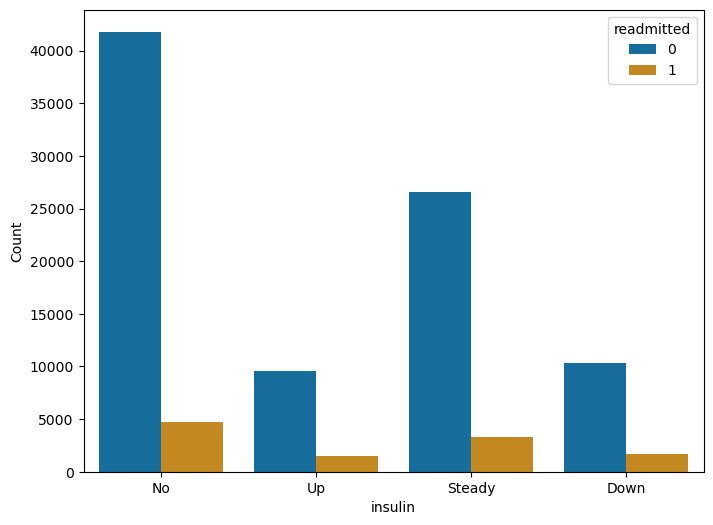

In [115]:
# Count plot using Seaborn for insulin
plt.figure(figsize=(8, 6))
sns.countplot(x='insulin', hue='readmitted',data=data2, palette='colorblind')
plt.xlabel('insulin')
plt.ylabel('Count')
plt.show()


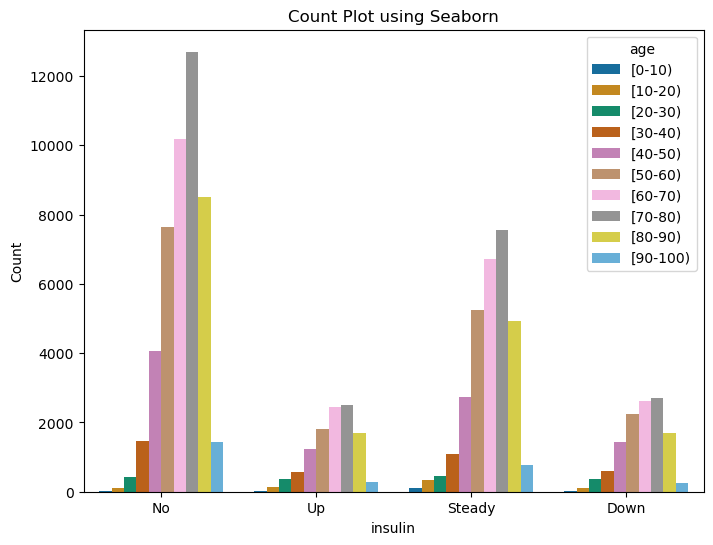

In [116]:
plt.figure(figsize=(8, 6))
sns.countplot(x='insulin', hue='age',data=data2, palette='colorblind')
plt.xlabel('insulin')
plt.ylabel('Count')
plt.title('Count Plot using Seaborn')
plt.show()

Correlation Heatmap:


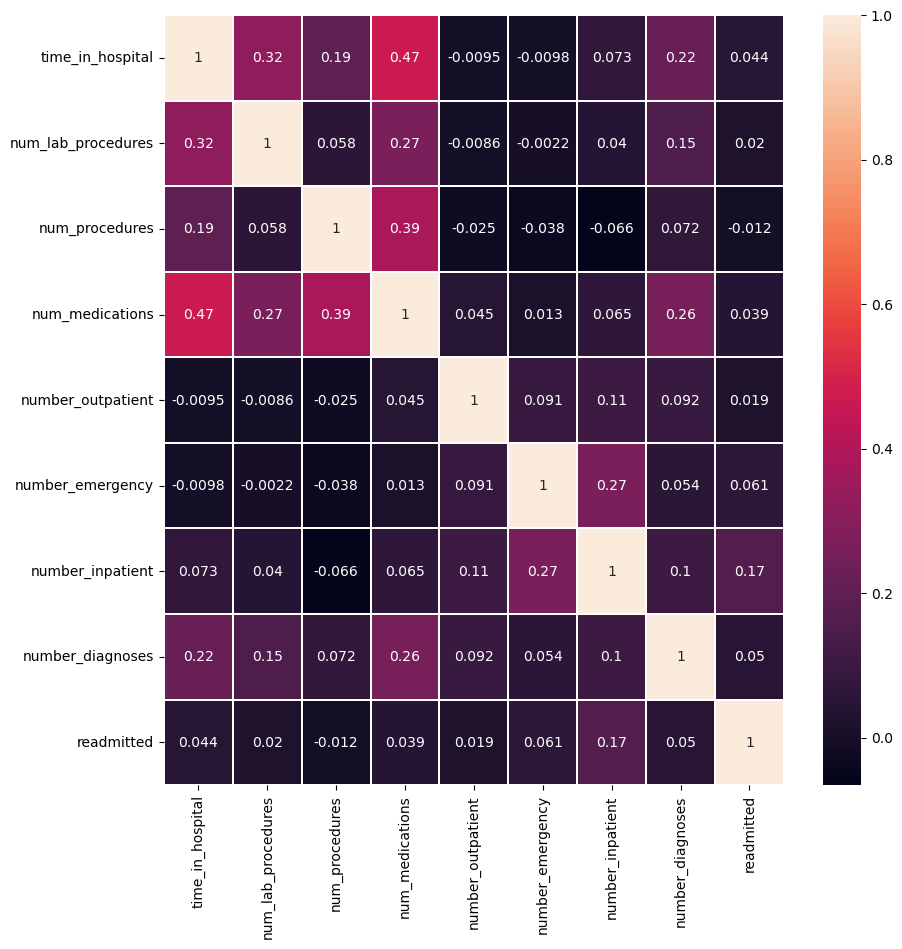

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses','readmitted' ]

print("Correlation Heatmap:")
sns.heatmap(data[numerical_columns].corr() , annot=True,  linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()
print("\n")



In [119]:
data


,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,diag_3_Injury and poisoning,diag_3_Mental disorders,diag_3_Musculoskeletal system diseases,diag_3_Neoplasms,diag_3_Nervous system diseases,"diag_3_Pregnancy, childbirth, and the puerperium",diag_3_Respiratory system diseases,diag_3_Skin and subcutaneous tissue diseases,"diag_3_Symptoms, signs, and abnormal clinical findings",diag_3_Unknown
0,0,0,1,41,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,1,3,59,0,18,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0
2,0,2,2,11,5,13,2,0,1,6,...,0,0,0,0,0,0,0,0,0,0
3,1,3,2,44,1,16,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0
4,1,4,1,51,0,8,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,7,3,51,0,16,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0
101762,0,8,5,33,3,18,0,0,1,9,...,0,0,0,0,0,0,0,0,1,0
101763,1,7,1,53,0,9,1,0,0,13,...,0,1,0,0,0,0,0,0,0,0
101764,0,8,10,45,2,21,0,0,1,9,...,1,0,0,0,0,0,0,0,0,0


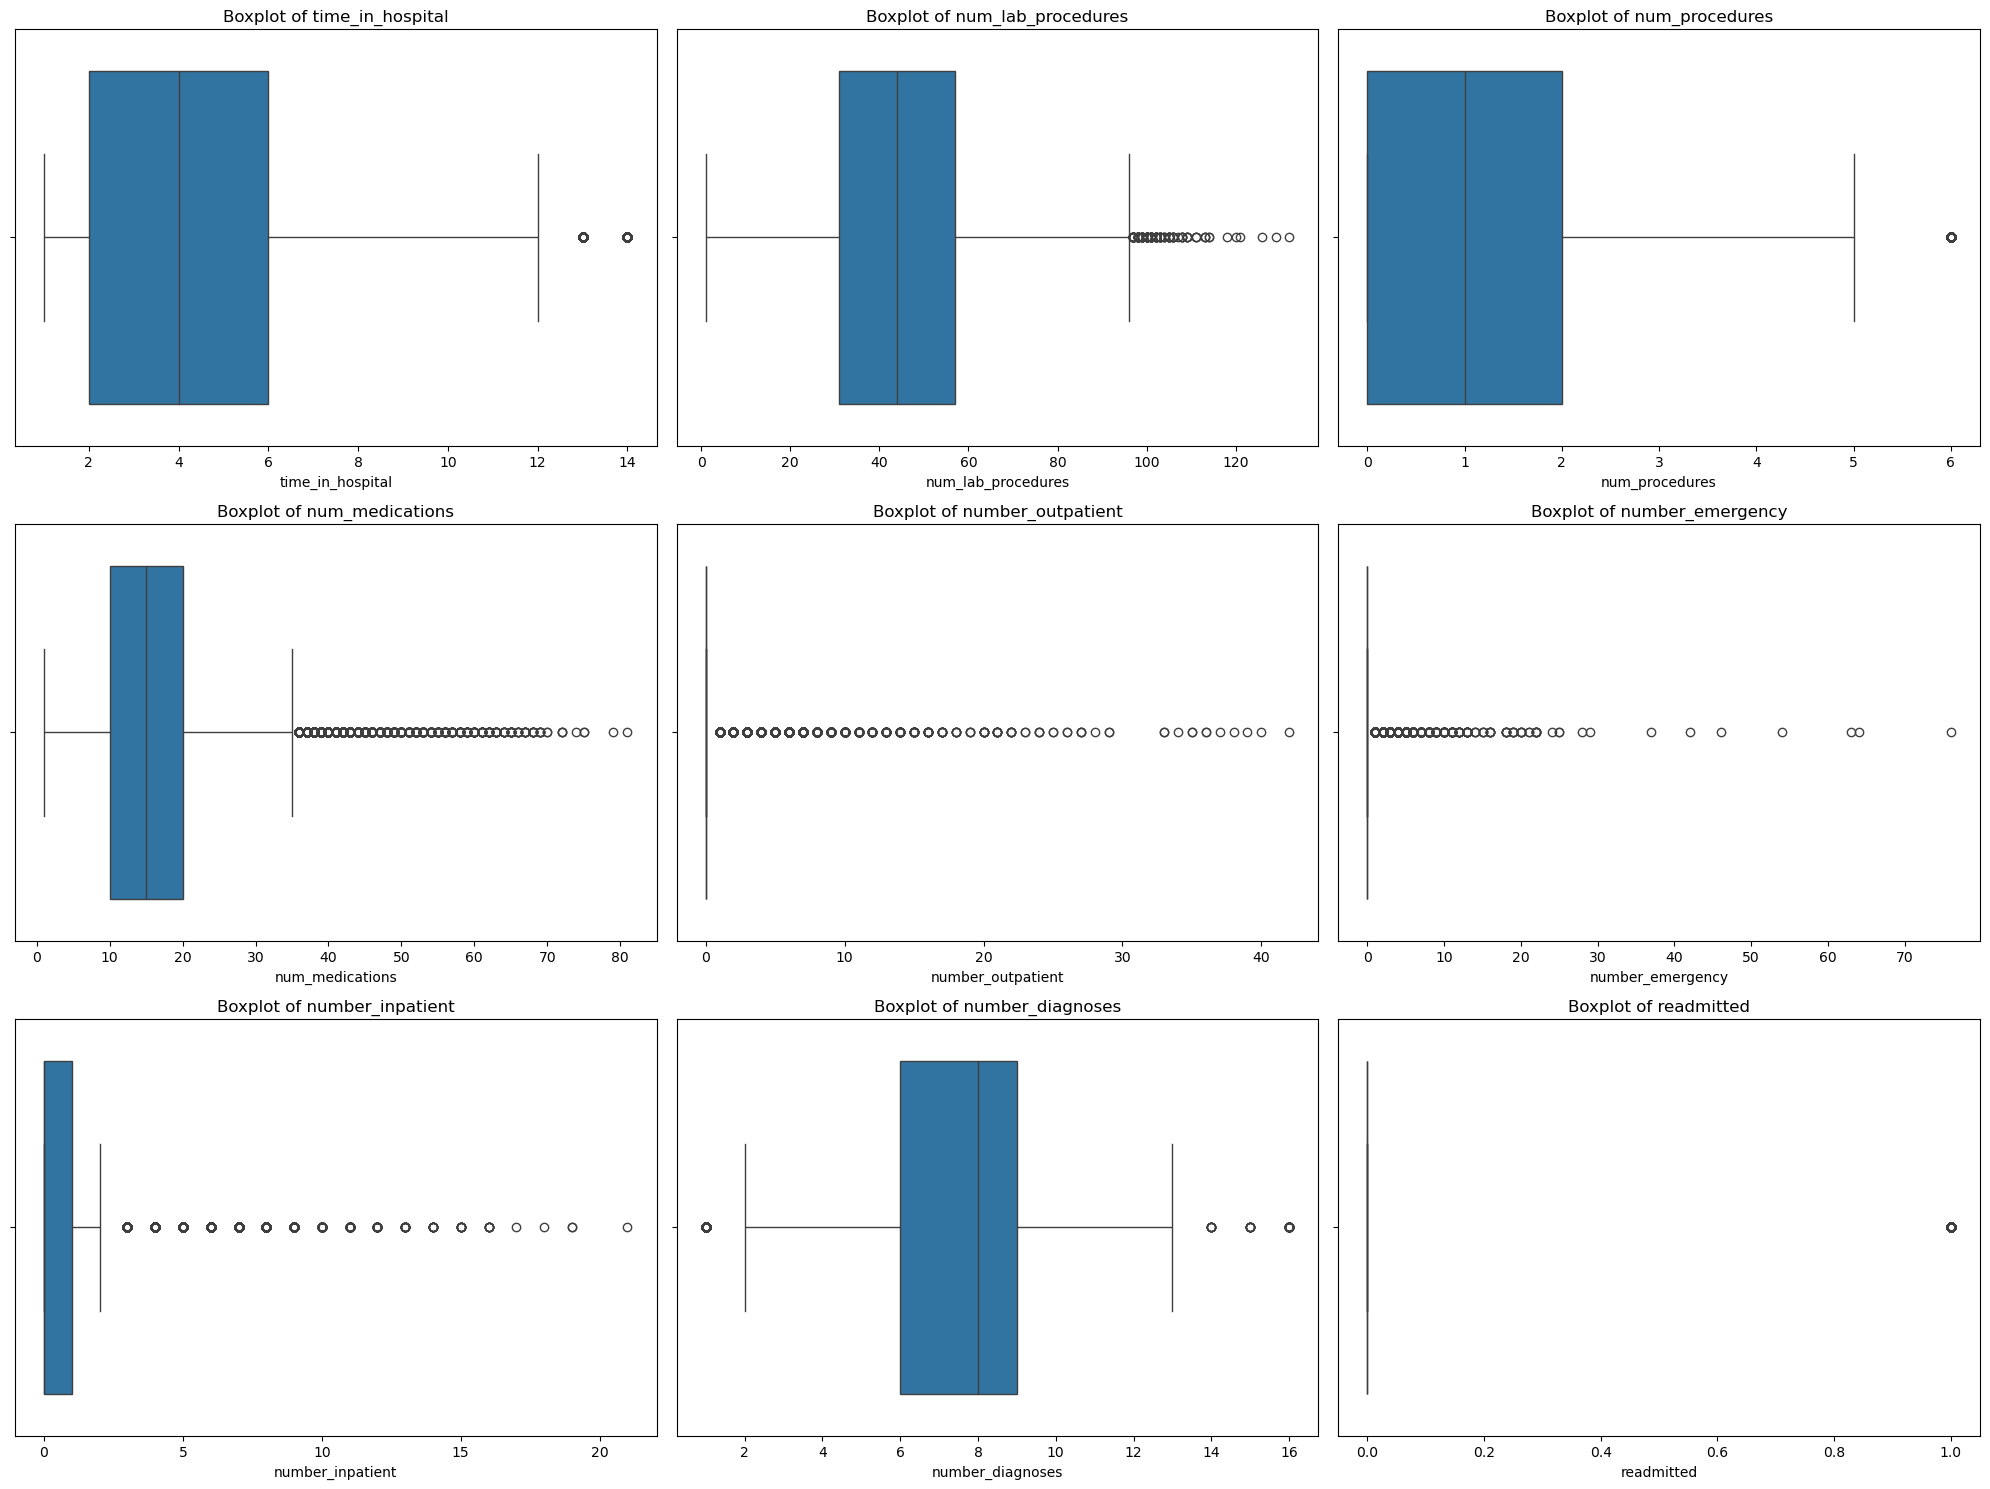

In [122]:
numerical_columns = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses' ]

plt.figure(figsize=(20, 15))

for idx, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, idx)  
    sns.boxplot(data=data, x=col)
    plt.title(f'Boxplot of {col}', fontsize=12)

plt.tight_layout()
plt.show()


C:\Temp\ipykernel_15108\2639782305.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='readmitted',data=data, palette='colorblind')


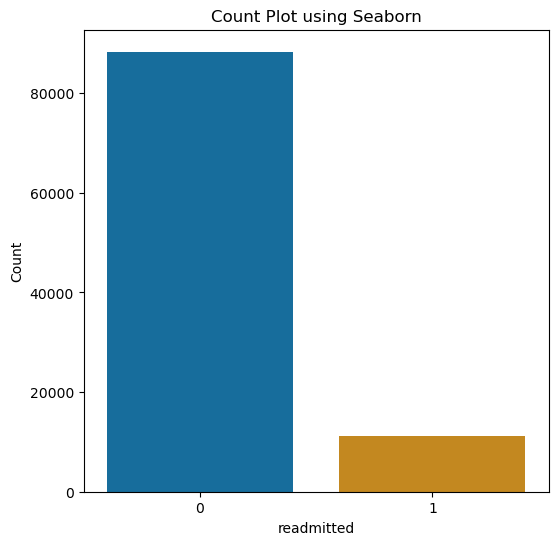

In [123]:
# Count plot using Seaborn for insulin

plt.figure(figsize=(6, 6))
sns.countplot(x='readmitted',data=data, palette='colorblind')
plt.xlabel('readmitted')
plt.ylabel('Count')
plt.title('Count Plot using Seaborn')
plt.show()


**•	 Remove or handle outliers**

In [124]:

numerical_columns = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses'
]


for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = data[col].apply(
        lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
    )



In [126]:
###########data['patient_service'] = data['number_outpatient'] + data['number_emergency'] + data['number_inpatient']

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99491 entries, 0 to 101765
Columns: 144 entries, gender to diag_3_Unknown
dtypes: float64(8), int32(108), int64(28)
memory usage: 69.1 MB


**Normalize or standardize numerical columns**

In [129]:

numeric_cols = list(data.select_dtypes(include=['int64', 'float64','int32']).columns)
if 'readmitted' in numeric_cols:
    numeric_cols.remove('readmitted')

# Apply scaling
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])   



,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,diag_3_Injury and poisoning,diag_3_Mental disorders,diag_3_Musculoskeletal system diseases,diag_3_Neoplasms,diag_3_Nervous system diseases,"diag_3_Pregnancy, childbirth, and the puerperium",diag_3_Respiratory system diseases,diag_3_Skin and subcutaneous tissue diseases,"diag_3_Symptoms, signs, and abnormal clinical findings",diag_3_Unknown
0,-0.925765,-3.823153,-1.163103,-0.104976,-0.817688,-2.003635,0.0,0.0,-0.637264,-3.096234,...,-0.139269,-0.178106,-0.13814,-0.136621,-0.132124,-0.055179,-0.267224,-0.158494,-0.215466,8.532665
1,-0.925765,-3.195947,-0.472017,0.810161,-0.817688,0.295520,0.0,0.0,-0.637264,0.813685,...,-0.139269,-0.178106,-0.13814,-0.136621,-0.132124,-0.055179,-0.267224,-0.158494,-0.215466,-0.117197
2,-0.925765,-2.568740,-0.817560,-1.630205,2.346649,-0.380702,0.0,0.0,0.590542,-0.750282,...,-0.139269,-0.178106,-0.13814,-0.136621,-0.132124,-0.055179,-0.267224,-0.158494,-0.215466,-0.117197
3,1.080187,-1.941534,-0.817560,0.047547,-0.184820,0.025031,0.0,0.0,-0.637264,-0.228960,...,-0.139269,-0.178106,-0.13814,-0.136621,-0.132124,-0.055179,-0.267224,-0.158494,-0.215466,-0.117197
4,1.080187,-1.314328,-1.163103,0.403434,-0.817688,-1.056924,0.0,0.0,-0.637264,-1.271605,...,-0.139269,-0.178106,-0.13814,-0.136621,-0.132124,-0.055179,-0.267224,-0.158494,-0.215466,-0.117197


In [130]:

#################################



In [131]:
data.shape

(99491, 144)

In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

X = data.drop('readmitted', axis=1)
y = data['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[11785  5880]
 [ 1019  1215]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.67      0.77     17665
           1       0.17      0.54      0.26      2234

    accuracy                           0.65     19899
   macro avg       0.55      0.61      0.52     19899
weighted avg       0.84      0.65      0.72     19899



In [137]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
classification_report,confusion_matrix,roc_auc_score,precision_recall_curve,auc)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


X = data.drop('readmitted', axis=1)
y = data['readmitted']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    max_depth=10,         
    min_samples_split=10,
    max_features='sqrt',
    random_state=42
)
model.fit(X_train_smote, y_train_smote)


y_pred = model.predict(X_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))





Confusion Matrix:
[[16327  1338]
 [ 1889   345]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     17665
           1       0.20      0.15      0.18      2234

    accuracy                           0.84     19899
   macro avg       0.55      0.54      0.54     19899
weighted avg       0.82      0.84      0.83     19899



In [134]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# from sklearn.metrics import classification_report, confusion_matrix
# from imblearn.over_sampling import SMOTE

# # تحضير البيانات
# X = data.drop('readmitted', axis=1)
# y = data['readmitted']

# # تقسيم البيانات
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    
# # تطبيق SMOTE
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# # تدريب نموذج SVM
# svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
# svm_model.fit(X_train, y_train)

# # التنبؤ والتقييم
# y_pred = svm_model.predict(X_test)

# print("SVM - Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))
# print("\nSVM - Classification Report:")
# print(classification_report(y_test, y_pred))


In [68]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# تحضير البيانات
X = data.drop('readmitted', axis=1)
y = data['readmitted']
# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# تطبيق SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# تدريب نموذج XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)

# التنبؤ والتقييم
y_pred = xgb_model.predict(X_test)

print("XGBoost - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nXGBoost - Classification Report:")
print(classification_report(y_test, y_pred))


c:\Users\pc\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:53:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost - Confusion Matrix:
[[17597    68]
 [ 2182    52]]

XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     17665
           1       0.43      0.02      0.04      2234

    accuracy                           0.89     19899
   macro avg       0.66      0.51      0.49     19899
weighted avg       0.84      0.89      0.84     19899



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


X = data.drop('readmitted', axis=1)
y = data['readmitted']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_smote, y_train_smote)

y_pred = knn_model.predict(X_test)

print("KNN - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nKNN - Classification Report:")
print(classification_report(y_test, y_pred))


KNN - Confusion Matrix:
[[11438  6227]
 [ 1201  1033]]

KNN - Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.65      0.75     17665
           1       0.14      0.46      0.22      2234

    accuracy                           0.63     19899
   macro avg       0.52      0.55      0.49     19899
weighted avg       0.82      0.63      0.69     19899

